In [22]:
import numpy as np
from matplotlib import pyplot as plt
from ncon import ncon
from numpy.linalg import norm, svd
import CTMRG_better_4 as CTM
import colorsys

plt.rcParams['figure.figsize'] = [25,12]
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])
Z = np.array([[1, 0], [0, -1]])

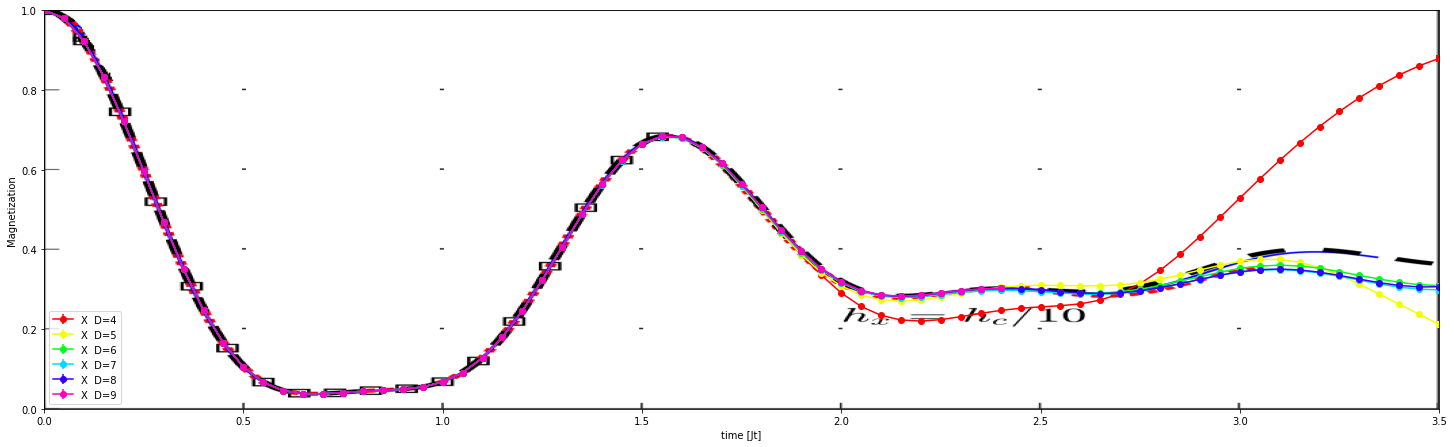

In [24]:
# for dir in ['./ISING_12_3_1.0_0.30444_0.005_250','./ISING_16_4_1.0_0.30444_0.005_250','./ISING_20_5_1.0_0.30444_0.005_250','./ISING_24_6_1.0_0.30444_0.005_250']:
fig, ax1 = plt.subplots()
ax1.imshow(plt.imread("./NTUplot.png"), extent=[0,3.5,0,1])
ax1.set_xlabel("time [Jt]")
ax1.set_ylabel("Magnetization")
ax2.set_ylabel("CTMRG error")
h = 0.07611
# h = 0.38055
# h = 0.7611
# h = 1.5222
dirs = [f'./ISING_16_4_1.0_{h}_0.05_45',f'./ISING_20_5_1.0_{h}_0.05_45',f'./ISING_24_6_1.0_{h}_0.05_45',f'./ISING_28_7_1.0_{h}_0.05_45',f'./ISING_32_8_1.0_{h}_0.05_45',f'./ISING_36_9_1.0_{h}_0.05_45']
dirs = ['./ISING-NTU4_16_4_1.0_0.07611000000000001_0.005_700','./ISING-NTU4_20_5_1.0_0.07611000000000001_0.005_700','./ISING-NTU4_24_6_1.0_0.07611000000000001_0.005_700','./ISING-NTU4_28_7_1.0_0.07611000000000001_0.005_700','./ISING-NTU4_32_8_1.0_0.07611000000000001_0.005_700','./ISING-NTU4_36_9_1.0_0.07611000000000001_0.005_700']
n = len(dirs)
colors = [colorsys.hsv_to_rgb(x,1,1) for x in np.linspace(0,7/8,6,endpoint=True)]
xs=np.array([0])
# for n,dir in enumerate(['ISING_10_2_1.0_0.07611_0.01_300','./ISING_32_8_1.0_0.07611_0.05_100']):
for n,dir in enumerate(dirs):
    try:
        SPECS = dict(np.load(dir + '/SPECS.npz'))
    except: continue
    ts, ctmerrs = [], []
    XXAs, ZZAs, ZAs, XAs = [], [], [], []
    XXBs, ZZBs, ZBs, XBs = [], [], [], []
    NTUXXAs, NTUZZAs, NTUZAs, NTUXAs = [], [], [], []
    NTUXXBs, NTUZZBs, NTUZBs, NTUXBs = [], [], [], []
    for iter in range(int(SPECS['n']+1)):
        try:
            peps = dict(np.load(dir + '/PEPS_{:05d}.npz'.format(iter)))
            env = dict(np.load(dir + '/RHOA_{:05d}.npz'.format(iter)))
            obs = dict(np.load(dir + '/OBS_{:05d}.npz'.format(iter)))
            ntuobs = dict(np.load(dir + '/NTUOBS_{:05d}.npz'.format(iter)))
        except:
            # print("B",iter)
            continue
        # print("-",iter)
        ts.append(peps['iter']*peps['dt'])
        ctmerrs.append(env['error'])
        ZAs.append(np.real_if_close(obs['ZA']))
        ZBs.append(np.real_if_close(obs['ZB']))
        XAs.append(np.real_if_close(obs['XA']))
        XBs.append(np.real_if_close(obs['XB']))
        NTUZAs.append(np.real_if_close(ntuobs['ZA']))
        NTUZBs.append(np.real_if_close(ntuobs['ZB']))
        NTUXAs.append(np.real_if_close(ntuobs['XA']))
        NTUXBs.append(np.real_if_close(ntuobs['XB']))
    ctmerrs = np.array(ctmerrs)
    log10ctmerrs = np.log10(np.where(ctmerrs > 1e-15, ctmerrs, 1e-15))
    XAs = np.array(XAs)
    XBs = np.array(XBs)
    ZAs = np.array(ZAs)
    ZBs = np.array(ZBs)
    NTUXAs = np.array(NTUXAs)
    NTUXBs = np.array(NTUXBs)
    NTUZAs = np.array(NTUZAs)
    NTUZBs = np.array(NTUZBs)
    # plt.scatter(ts,+0.0004+(XAs),label='X CTMRG '+str(dir.split('_')[2]), color='r', marker = '$A$')
    # plt.scatter(ts,-0.0004+(XBs),label='X CTMRG '+str(dir.split('_')[2]), color='r', marker = '$B$')

    ax1.errorbar(ts,(XAs+XBs)/2,(np.abs(XAs-XBs)/2),label='X  D='+str(dir.split('_')[2]), color=colors[n], marker = 'o', ls='-')
    ax1.scatter([ts[-1]],[((XAs+XBs)/2)[-1]],color=colors[n],marker='s')

ax1.set_facecolor('white')
ax1.legend()
plt.show()

/home/mazur/PycharmProjects/TensorNetworks/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/numpy/ma/core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


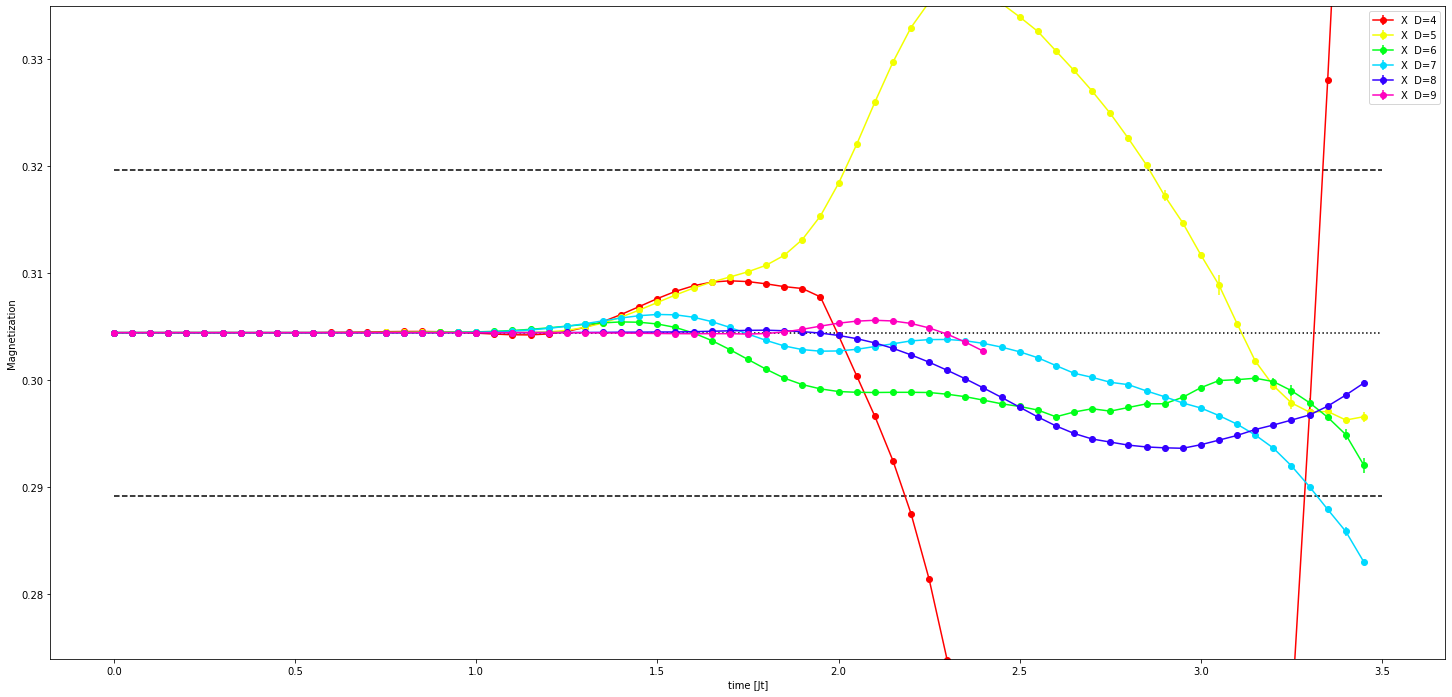

In [20]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("time [Jt]")
ax1.set_ylabel("Magnetization")
h = 0.07611
# h = 0.38055

# h = 0.7611
# h = 1.5222
colors = [colorsys.hsv_to_rgb(x,1,1) for x in np.linspace(0,7/8,6,endpoint=True)]
xs=np.array([0])
for n,dir in enumerate(dirs):
    try:
        SPECS = dict(np.load(dir + '/SPECS.npz'))
    except: continue
    ts, ctmerrs = [], []
    XXAs, ZZAs, ZAs, XAs = [], [], [], []
    XXBs, ZZBs, ZBs, XBs = [], [], [], []
    XXs, ZZs, Zs, Xs = [], [], [], []
    NTUXXAs, NTUZZAs, NTUZAs, NTUXAs = [], [], [], []
    NTUXXBs, NTUZZBs, NTUZBs, NTUXBs = [], [], [], []
    for iter in range(int(SPECS['n'])):
        try:
            peps = dict(np.load(dir + '/PEPS_{:05d}.npz'.format(iter)))
            env = dict(np.load(dir + '/RHOA_{:05d}.npz'.format(iter)))
            obs = dict(np.load(dir + '/OBS_{:05d}.npz'.format(iter)))
            ntuobs = dict(np.load(dir + '/NTUOBS_{:05d}.npz'.format(iter)))
        except:
            # print("B",iter)
            continue
        # print("-",iter)
        ts.append(peps['iter']*peps['dt'])
        ctmerrs.append(env['error'])
        ZZs.append(env['vals2'][0])
        ZAs.append(np.real_if_close(obs['ZA']))
        ZBs.append(np.real_if_close(obs['ZB']))
        XAs.append(np.real_if_close(obs['XA']))
        XBs.append(np.real_if_close(obs['XB']))
        NTUZAs.append(np.real_if_close(ntuobs['ZA']))
        NTUZBs.append(np.real_if_close(ntuobs['ZB']))
        NTUXAs.append(np.real_if_close(ntuobs['XA']))
        NTUXBs.append(np.real_if_close(ntuobs['XB']))
    ctmerrs = np.array(ctmerrs)
    log10ctmerrs = np.log10(np.where(ctmerrs > 1e-15, ctmerrs, 1e-15))
    XAs = np.array(XAs)
    XBs = np.array(XBs)
    ZAs = np.array(ZAs)
    ZBs = np.array(ZBs)
    ZZs = np.array(ZZs)
    NTUXAs = np.array(NTUXAs)
    NTUXBs = np.array(NTUXBs)
    NTUZAs = np.array(NTUZAs)
    NTUZBs = np.array(NTUZBs)

    ax1.errorbar(ts,np.mean(ZZs,axis=1)*2+3.0444/10*(XAs+XBs)/2,np.std(ZZs,axis=1),label='X  D='+str(dir.split('_')[2]), color=colors[n], marker = 'o', ls='-')

ax1.plot([0,3.5],[0.30444,0.30444],ls=':',color='k')
ax1.plot([0,3.5],[0.30444+0.0030444*5,0.30444+0.0030444*5],ls='--',color='k')
ax1.plot([0,3.5],[0.30444-0.0030444*5,0.30444-0.0030444*5],ls='--',color='k')
ax1.set_ylim((0.30444-0.030444,0.30444+0.030444))
ax1.set_facecolor('white')
ax1.legend()
plt.show()

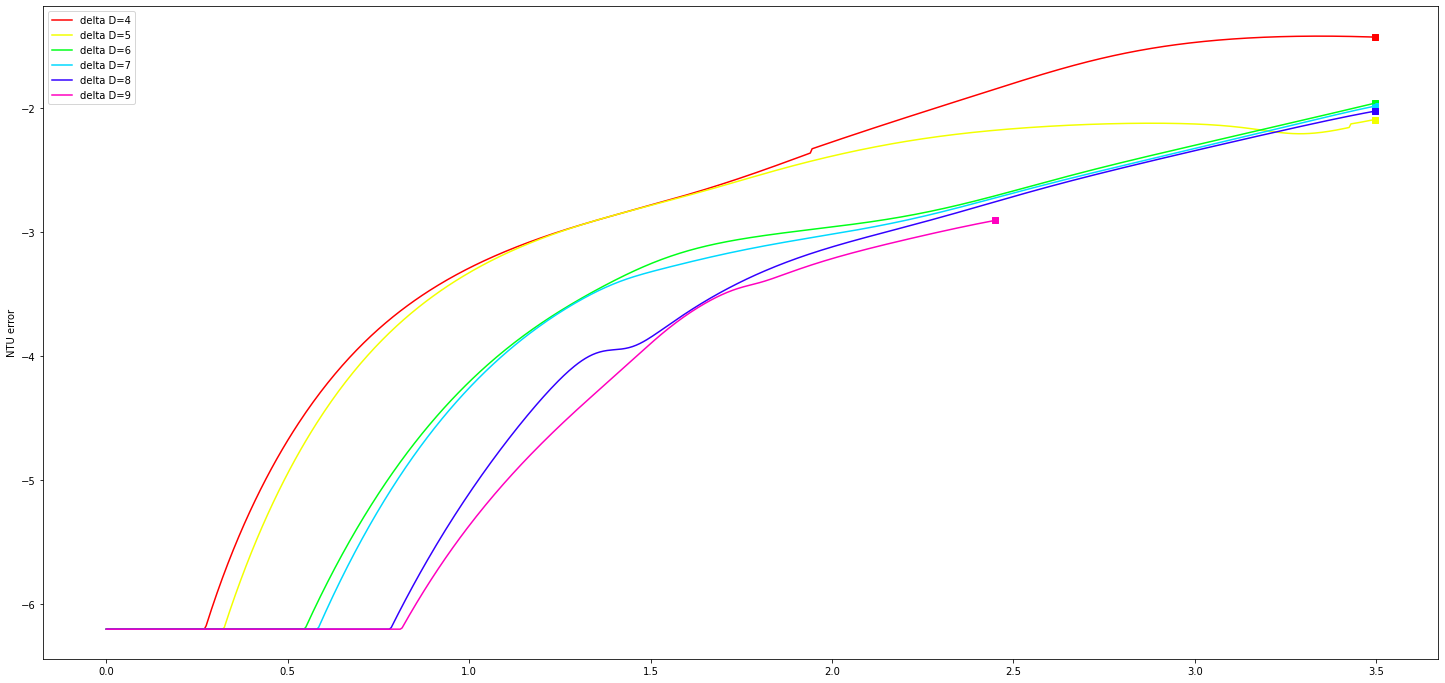

In [25]:
# for dir in ['./ISING_12_3_1.0_0.30444_0.005_250','./ISING_16_4_1.0_0.30444_0.005_250','./ISING_20_5_1.0_0.30444_0.005_250','./ISING_24_6_1.0_0.30444_0.005_250']:
fig, ax2 = plt.subplots()
ax2.set_ylabel("NTU error")
xs=np.array([0])
# for n,dir in enumerate(['ISING_10_2_1.0_0.07611_0.01_300','./ISING_32_8_1.0_0.07611_0.05_100']):
for n,dir in enumerate(dirs):
    try:
        SPECS = dict(np.load(dir + '/SPECS.npz'))
    except: continue
    ts, ntuerrs = [], []
    for iter in range(int(SPECS['n'])):
        try:
            peps = dict(np.load(dir + '/PEPS_{:05d}.npz'.format(iter)))
        except:
            continue
        ts.append(peps['iter']*peps['dt'])
        ntuerrs.append(peps['NTUerror'])
    ntuerrs = np.array(ntuerrs)
    log10ntuerrs = np.real_if_close(np.log10(np.sqrt(np.where(ntuerrs > 1e-15, ntuerrs, 1e-15))/0.05),tol=10000)
    ts = np.array(ts)
    ax2.plot(ts,(0*n/10)+log10ntuerrs,label = 'delta D=' + dir.split('_')[2],color=colors[n])
    ax2.scatter([ts[-1]],[log10ntuerrs[-1]],color=colors[n],marker='s')
ax2.legend()

In [21]:
10 ** np.arange(np.floor(np.log10(1.0001e-14)),-2,1)

array([1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07,
       1.e-06, 1.e-05, 1.e-04, 1.e-03])

/tmp/ipykernel_27596/3258003582.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


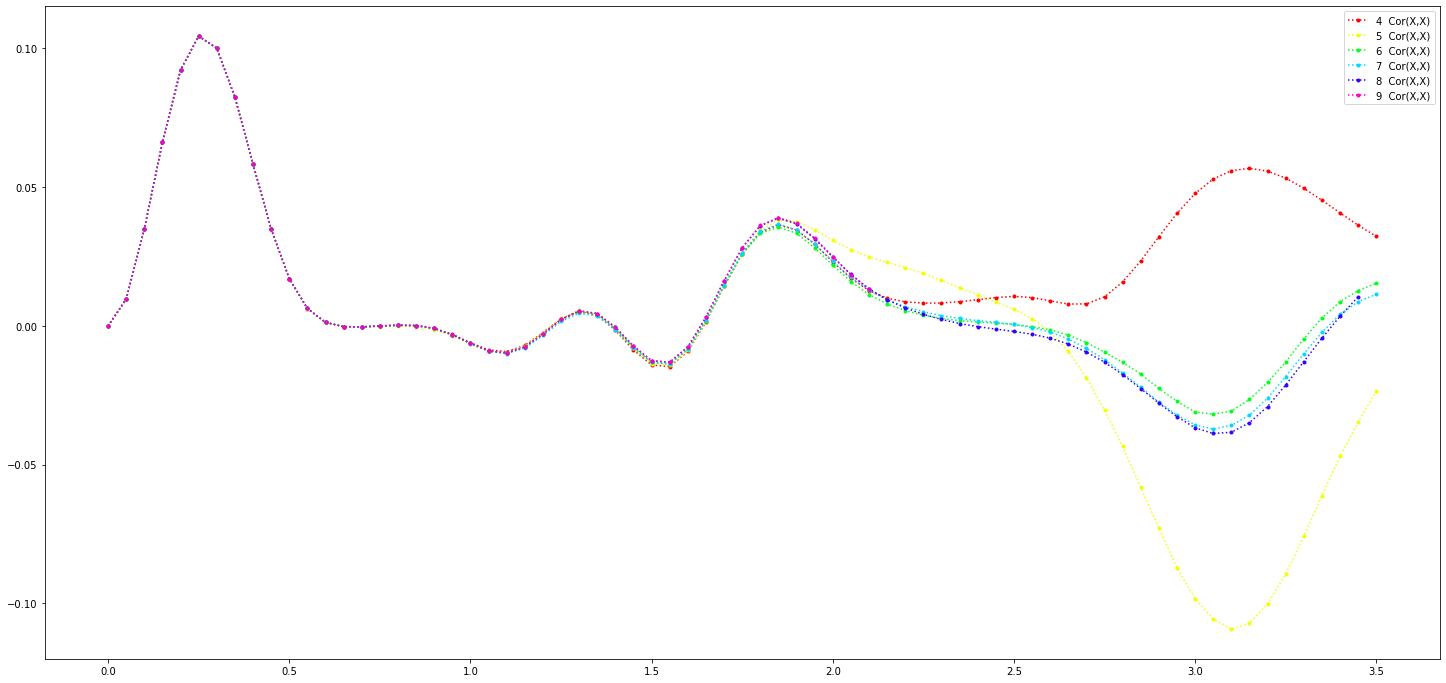

In [26]:
fig, ax = plt.subplots()
X, Z = np.array([[0,1],[1,0]]), np.array([[1,0],[0,-1]])
for n,dir in enumerate(dirs):
    ts, XA, XB, ZA, ZB = [], [], [], [], []
    XX_NS_A, ZZ_NS_A, XX_WE_A, ZZ_WE_A = [], [], [], []
    XX_NS_B, ZZ_NS_B, XX_WE_B, ZZ_WE_B = [], [], [], []
    OP_ZZ, OP_XX = [], []
    OP_Z, OP_X = [], []
    SPECS = dict(np.load(dir + '/SPECS.npz'))
    D = SPECS['D']
    for i in range(701):
        try:
            PEPS = dict(np.load(dir+'/PEPS_{:05}.npz'.format(i)))
            env = dict(np.load(dir+'/RHOA_{:05}.npz'.format(i)))
        except: continue
        ts.append(PEPS['iter'] * PEPS['dt'])
        OP_XX.append(env['vals2'][1])
        OP_ZZ.append(env['vals2'][0])
        OP_X.append(env['vals1'][0])
        OP_Z.append(env['vals1'][1])

    ts = np.array(ts)
    OP_XX = np.array(OP_XX)
    OP_ZZ = np.array(OP_ZZ)

    ax.plot(ts, np.real_if_close(np.mean(OP_XX,axis=1))-np.real_if_close(np.mean(OP_X,axis=1))**2, label = str(D) + '  Cor(X,X)', color=colors[n], marker='.', ls=':')
ax.legend()
fig.show()

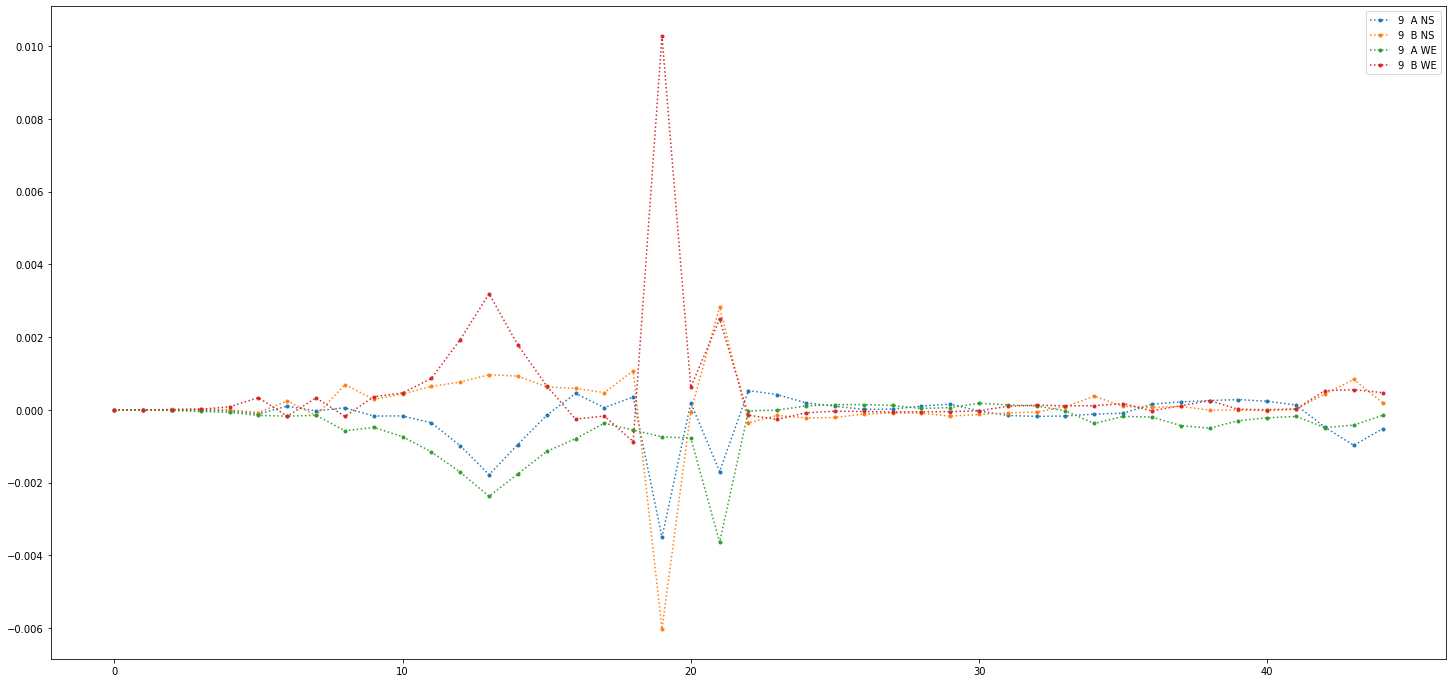

In [15]:
ts = np.array(ts)
OP_ZZ = np.array(OP_ZZ)
fig, ax = plt.subplots()
# ax.plot(np.mean(OP_ZZ.T,axis=0).real, label = str(D) + '  mean', marker='.', ls=':')
ax.plot((OP_ZZ.T[0].real - np.mean(OP_ZZ.T,axis=0).real) / (np.mean(OP_ZZ.T,axis=0).real), label = str(D) + '  A NS', marker='.', ls=':')
ax.plot((OP_ZZ.T[1].real - np.mean(OP_ZZ.T,axis=0).real) / (np.mean(OP_ZZ.T,axis=0).real), label = str(D) + '  B NS', marker='.', ls=':')
ax.plot((OP_ZZ.T[2].real - np.mean(OP_ZZ.T,axis=0).real) / (np.mean(OP_ZZ.T,axis=0).real), label = str(D) + '  A WE', marker='.', ls=':')
ax.plot((OP_ZZ.T[3].real - np.mean(OP_ZZ.T,axis=0).real) / (np.mean(OP_ZZ.T,axis=0).real), label = str(D) + '  B WE', marker='.', ls=':')
ax.legend()

In [88]:
X1, X2 = np.random.randn(5,2,3,3)+1j*np.random.randn(5,2,3,3),np.random.randn(5,2,3,3)+1j*np.random.randn(5,2,3,3)
T1 = X1.reshape(X1.shape[0],X1.shape[1]*X1.shape[2]*X1.shape[3])
T2 = X2.reshape(X2.shape[0],X2.shape[1]*X2.shape[2]*X2.shape[3])
u, s, vh = svd(T1 @ T2.T)

sd = [1]
maxnonzeroindex = 1
for i in range(1,len(s)):
    if s[i] > s[0] * 1e-10:
        maxnonzeroindex = 1
        if i < 4: sd.append(1 / np.sqrt(s[i] / s[0]))
    else: break

sd = np.diag(sd)

P1 = ncon([X2, sd @ (vh.conj())[:4,:]],([1,-1,-2,-3],[-4,1])).reshape(2*3*3,4)
P2 = ncon([X1, sd @ (u.conj().T)[:4, :]],([1,-1,-2,-3],[-4,1])).reshape(2*3*3,4)
P1 = sd @ (vh.conj())[:4,:] @ X2
P2 = sd @ (u.conj().T)[:4, :] @ X1
I1 = P1 @ P2.T
I2 = P1.T @ P2
print(I2 / I2[0,0])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 5)

In [125]:
i, dt = 10, 0.005

G = (np.sqrt(np.sinh(2*i * dt * 1j))) * np.einsum('ij,k->ijk', np.diag([1+0j, -1+0j]), np.array([0, 1])) + (np.sqrt(np.cosh(2*i * dt * 1j))) * np.einsum('ij,k->ijk', np.diag([1+0j, 1+0j]), np.array([1, 0]))
A0 = ncon([G,G,G,G,np.array([1,1])],([1,2,-1],[2,3,-2],[3,4,-3],[4,-5,-4],[1]))

M1a, M1b = np.eye(2), np.eye(2)
M2a, M2b = np.eye(2), np.eye(2)
M3a, M3b = np.eye(2), np.eye(2)
M4a, M4b = np.eye(2), np.eye(2)

A = ncon([G,G,G,G,np.array([1,1]),M1a,M2a,M3a,M4a],([1,2,5],[2,3,7],[3,4,6],[4,-5,8],[1],[-1,5],[-3,6],[-2,7],[-4,8]))
B = ncon([G,G,G,G,np.array([1,1]),M1b,M2b,M3b,M4b],([1,2,6],[2,3,8],[3,4,5],[4,-5,7],[1],[5,-1],[6,-2],[7,-3],[8,-4]))
print(norm(A))
print(norm(B))
print(norm(A-B))

1.6951744244110576
1.6951744244110576
1.415262216750919e-16


In [175]:
db = 0
G = (np.sqrt(np.sinh(db))) * np.einsum('ij,k->ijk', Z, np.array([0, 1])) + (np.sqrt(np.cosh(db))) * np.einsum('ij,k->ijk', I, np.array([1, 0]))
Gx = ncon([G,X],([-1,-2,1],[1,-3]))
Gz = ncon([G,X],([-1,-2,1],[1,-3]))
print(norm(ncon([G,G],([-1,-3,1],[-2,-4,1]))-ncon([Gx,Gx],([-1,-3,1],[-2,-4,1])))/norm(G))
print(norm(ncon([G,G],([-1,-3,1],[-2,-4,1]))-ncon([Gz,Gz],([-1,-3,1],[-2,-4,1])))/norm(G))

0.0
0.0


In [60]:
s = np.arange(2,100)
C_NW_A = np.ones((s[0],1))
C_NE_B = np.ones((1,1))
C_SW_B = np.ones((1,1))
C_SE_A = np.ones((1,1))
C_NW_B = np.ones((1,1))
C_NE_A = np.ones((1,1))
C_SW_A = np.ones((1,1))
C_SE_B = np.ones((1,1))
E_N_B = np.ones((1,s[0],1,1))
E_N_A = np.ones((1,1,1,1))
E_W_A = np.ones((1,1,1,1))
E_W_B = np.ones((1,1,1,1))
E_E_B = np.ones((1,1,1,1))
E_E_A = np.ones((1,1,1,1))
E_S_B = np.ones((1,1,1,1))
E_S_A = np.ones((1,1,1,1))
A = np.ones((1,1,1,1,1))
B = np.ones((1,1,1,1,1))
Ac = np.ones((1,1,1,1,1))
Bc = np.ones((1,1,1,1,1))

tensors = [C_NW_A, A, E_N_B, E_N_A, E_W_B, C_NE_B, E_E_A, Ac, B, Bc]
connects = [[3, 4], [10, 7, -5, 11, 5], [2, 3, 10, 13], [1, 2, 9, 14], [4, -4, 11, 12], [17, 1],
            [-1, 17, 16, 15], [13, 8, -6, 12, 5], [9, 16, -2, 7, 6], [14, 15, -3, 8, 6]]
con_order = [3, 4, 13, 12, 1, 17, 14, 15, 10, 11, 5, 9, 16, 6, 2, 8, 7]
UpperHalfA = ncon(tensors, connects, con_order)
tensors = [C_SW_B, E_W_A, C_SE_A, E_S_B, E_S_A, E_E_B, B, Bc, A, Ac]
connects = [[1, 2], [-4, 1, 10, 11], [4, 5], [3, 4, 15, 14], [2, 3, 12, 13], [5, -1, 17, 16],
            [-5, 8, 12, 10, 7], [-6, 9, 13, 11, 7], [-2, 17, 15, 8, 6], [-3, 16, 14, 9, 6]]
con_order = [1, 5, 4, 17, 15, 2, 11, 13, 10, 12, 7, 16, 14, 6, 3, 9, 8]
BottomHalfA = ncon(tensors, connects, con_order)
tensors = [C_NW_B, B, E_N_A, E_N_B, E_W_A, C_NE_A, E_E_B, Bc, A, Ac]
connects = [[3, 4], [10, 7, -5, 11, 5], [2, 3, 10, 13], [1, 2, 9, 14], [4, -4, 11, 12], [17, 1],
            [-1, 17, 16, 15], [13, 8, -6, 12, 5], [9, 16, -2, 7, 6], [14, 15, -3, 8, 6]]
con_order = [3, 4, 13, 12, 1, 17, 14, 15, 10, 11, 5, 9, 16, 6, 2, 8, 7]
UpperHalfB = ncon(tensors, connects, con_order)
tensors = [C_SW_A, E_W_B, C_SE_B, E_S_A, E_S_B, E_E_A, A, Ac, B, Bc]
connects = [[1, 2], [-4, 1, 10, 11], [4, 5], [3, 4, 15, 14], [2, 3, 12, 13], [5, -1, 17, 16],
            [-5, 8, 12, 10, 7], [-6, 9, 13, 11, 7], [-2, 17, 15, 8, 6], [-3, 16, 14, 9, 6]]
con_order = [1, 5, 4, 17, 15, 2, 11, 13, 10, 12, 7, 16, 14, 6, 3, 9, 8]
BottomHalfB = ncon(tensors, connects, con_order)

ValueError: In ncon.do_check_indices, for the contraction index 2, the leg 0 of tensor number 2 and the leg 1 of tensor number 3 are not compatible.

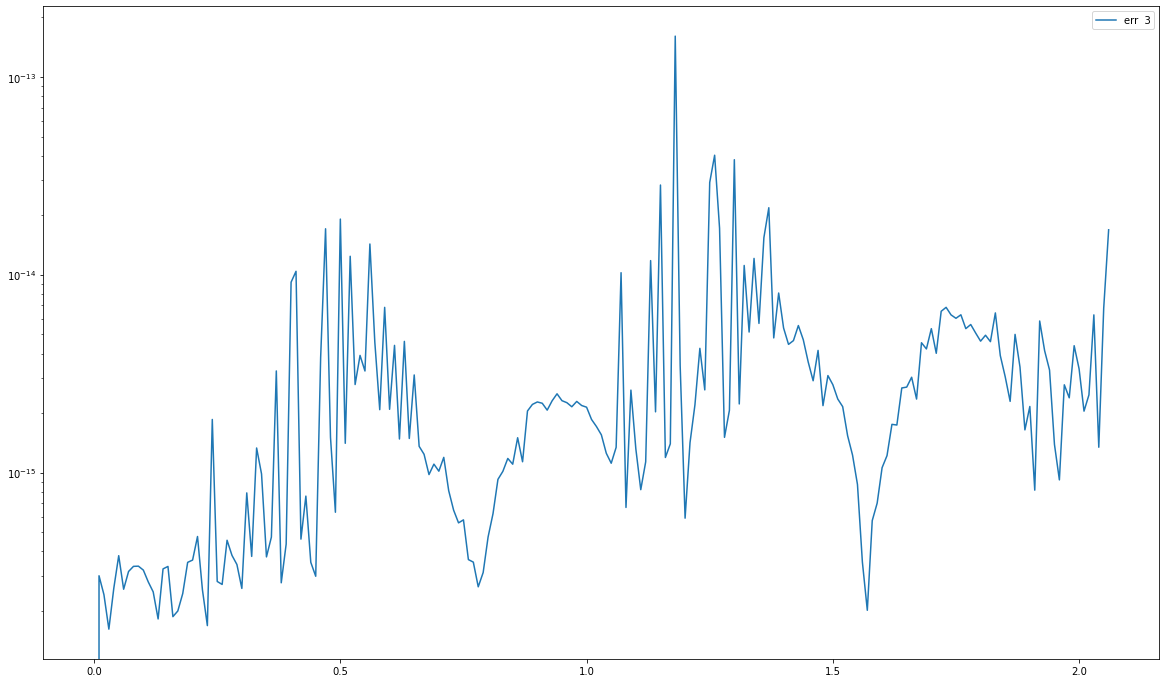

In [105]:

for dir in ['./ISING_10_3_1.0_0.0_0.01_250']:
    SPECS = dict(np.load(dir + '/SPECS.npz'))
    ts = []
    errs = []
    for iter in range(int(SPECS['n'])):
        try:
            peps = dict(np.load(dir + '/PEPS_{:05d}.npz'.format(iter)))
            env = dict(np.load(dir + '/RHOA_{:05d}.npz'.format(iter)))
        except:
            # print("B",iter)
            continue
        # print("-",iter)
        ts.append(peps['iter']*peps['dt'])
        errs.append(env['error'])

    plt.plot(ts,errs,label='err  '+str(dir.split('_')[2]))
plt.yscale('log')
plt.legend()
plt.show()

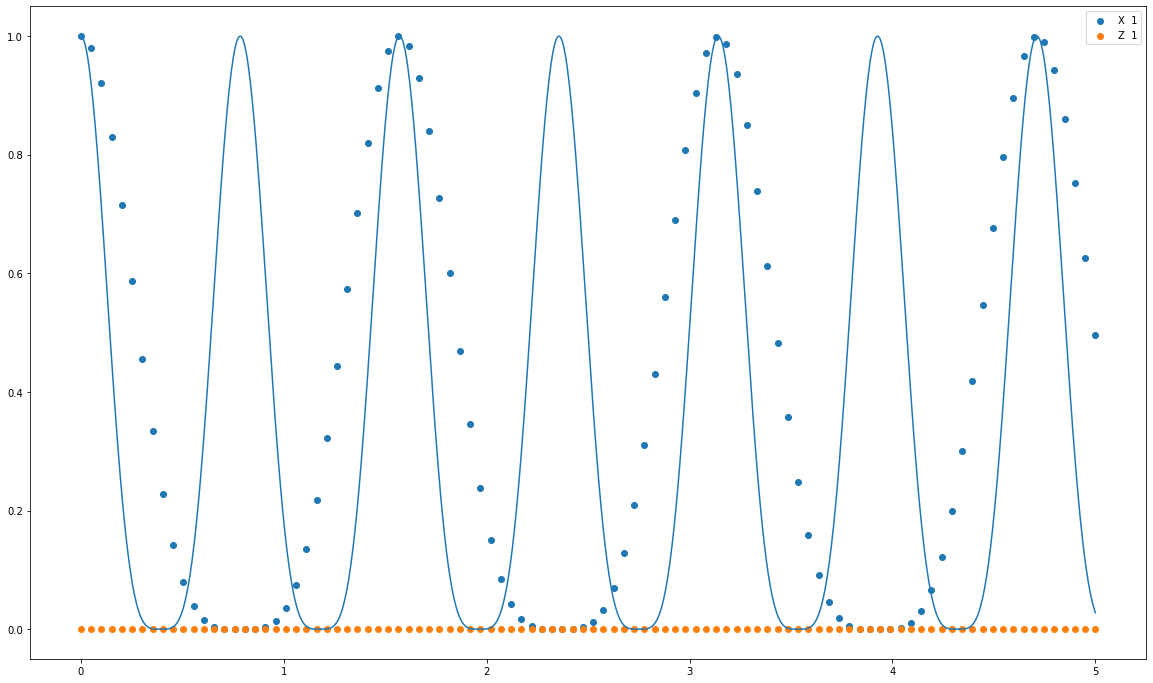

In [114]:
dir = './TI_5_1'
ts = []
errs = []
XXAs, ZZAs, ZAs, XAs = [], [], [], []
XXBs, ZZBs, ZBs, XBs = [], [], [], []
for iter in range(1000):
    try:
        env = dict(np.load(dir + '/RHOA_{:05d}.npz'.format(iter)))
    except:
        continue
    ts.append(env['beta'].imag)
    ZAs.append(np.trace(env['RhoThermalA'] @ np.array([[1,0],[0,-1]])))
    ZBs.append(np.trace(env['RhoThermalB'] @ np.array([[1,0],[0,-1]])))
    XAs.append(np.trace(env['RhoThermalA'] @ np.array([[0,1],[1,0]])))
    XBs.append(np.trace(env['RhoThermalB'] @ np.array([[0,1],[1,0]])))
ts = np.array(ts)
XAs = np.array(XAs)
XBs = np.array(XBs)
ZAs = np.array(ZAs)
ZBs = np.array(ZBs)
plt.scatter(ts,(XAs+XBs)/2,label='X  '+str(dir.split('_')[2]), color='C0')
plt.scatter(ts,(ZAs+ZBs)/2,label='Z  '+str(dir.split('_')[2]), color='C1')

xs = np.linspace(0,5,1000)
plt.plot(xs,np.cos(xs*4)**4)
plt.legend()
plt.show()

In [27]:
A,B = np.random.randn(10,9),np.random.randn(9,10)
u,s,vh = np.linalg.svd(A@B)
print(np.linalg.norm(A@B - u[:,:9]@np.diag(s[:9])@vh[:9,:])/np.linalg.norm(A@B))

1.2765762465350332e-15


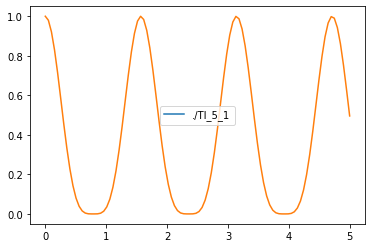

In [3]:
for n in np.arange(1,2):
    ts, M = [], []
    dir = './TI_5_'+str(n)
    for i in range(1000):
        try: env = dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))
        except: continue
        ts.append(np.abs(env['beta']))
        M.append(np.trace(env['RhoThermalA'] @ np.array([[0,1],[1,0]])).real)
    plt.plot(ts,M,label=dir)
# plt.ylim((-0.1,1.1))
plt.plot(np.linspace(0,5,100,endpoint=True),np.cos(np.linspace(0,5,100,endpoint=True)*2) ** 4)
plt.legend()
plt.show()

/tmp/ipykernel_4189/2519919274.py:12: RuntimeWarning: invalid value encountered in power
  res = np.where(sh <= 1, 0, (1 - sh**(-4))**(1/8))


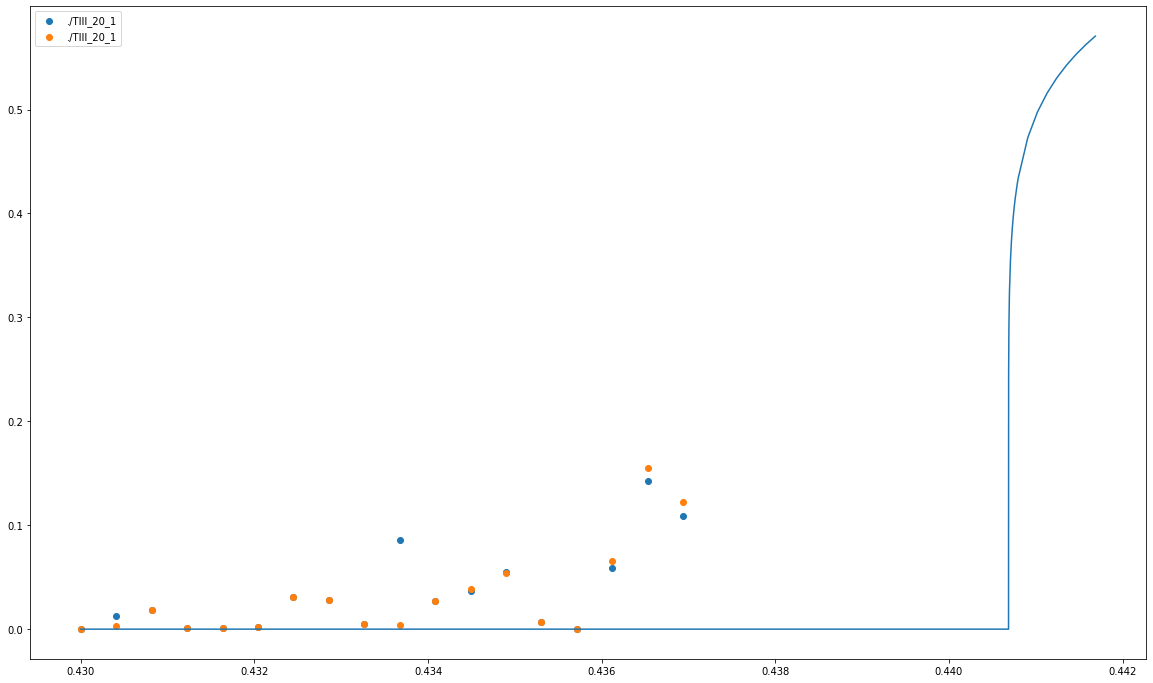

In [58]:

for n in np.arange(1,2):
    ts, MA, MB = [], [], []
    dir = './TIII_20_'+str(n)
    for i in range(1000):
        try: env = dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))
        except: continue
        ts.append(np.abs(env['beta']))
        MA.append(np.abs(np.trace(env['RhoThermalA'] @ np.array([[1,0],[0,-1]])).real))
        MB.append(np.abs(np.trace(env['RhoThermalB'] @ np.array([[1,0],[0,-1]])).real))
    plt.scatter(ts,MA,label=dir)
    plt.scatter(ts,MB,label=dir)
ts = np.array(ts)
bs = np.linspace(ts.min(),ts.max(),1000)
plt.plot(*M_ONS(ts.min(),ts.max()))
# plt.ylim((-0.1,1.1))
plt.legend()
plt.show()


/tmp/ipykernel_4189/1193292330.py:12: RuntimeWarning: invalid value encountered in power
  res = np.where(sh <= 1, 0, (1 - sh**(-4))**(1/8))


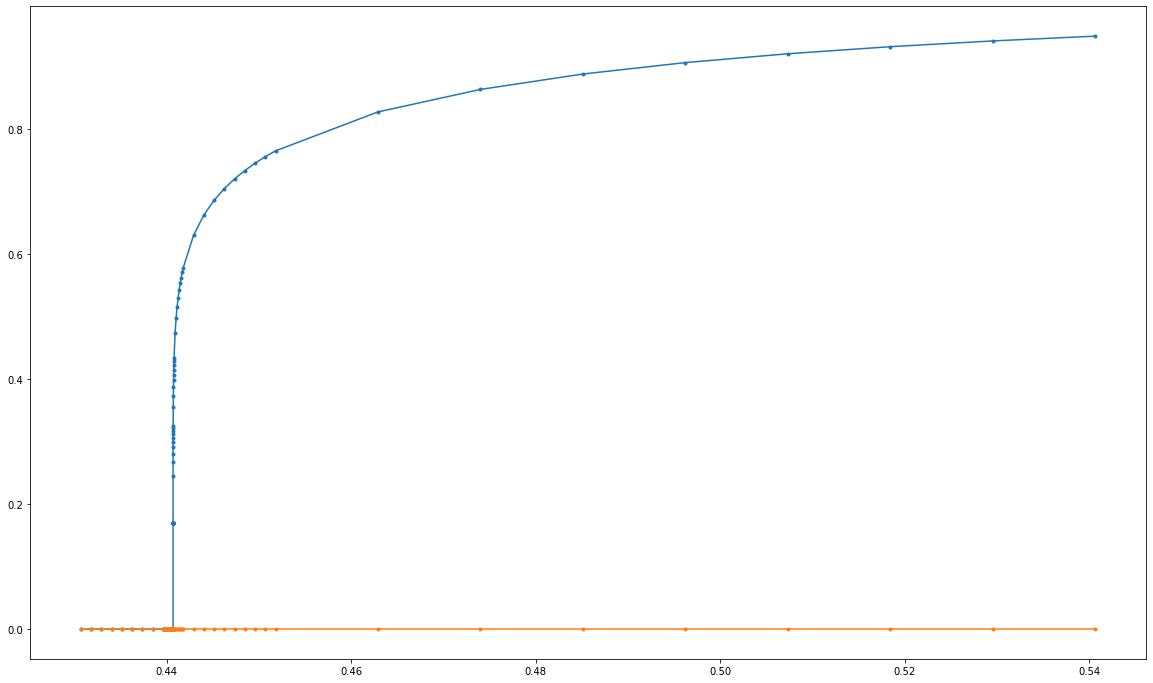

In [36]:
bc = 1/2.269185
bs = np.array([])
for i in range(5):
    bs = np.concatenate((bs,np.linspace(bc,bc+10**(-i-1),10),np.linspace(bc-10**(-i-2),bc,10)))
bs = np.sort(bs)
plt.plot(bs,M_onsager(bs),marker='.')
plt.plot(bs,[0]*len(bs),marker='.')
plt.show()

In [ ]:
from ncon import ncon
beta = 100000
G = (1j*np.sqrt(np.tanh(beta)))*np.einsum('ij,k->ijk', np.diag([1,-1]), np.array([1, 0])) + np.einsum('ij,k->ijk', np.diag([1,1]), np.array([0, 1]))
A = ncon([G,G,G,G],([-5,1,-1],[1,2,-2],[2,3,-3],[3,-6,-4]))
G

In [17]:
print(ncon([A,A.conj()],([3,-1,-3,4,1,2],[3,-2,-4,4,2,1])).reshape(4,4))
print(ncon([A,A.conj()],([3,-1,-3,4,1,2],[3,-2,-4,4,1,2])).reshape(4,4))

[[ 8.+0.j  0.+0.j  0.+0.j  8.+0.j]
 [ 0.+0.j -8.+0.j  8.+0.j  0.+0.j]
 [ 0.+0.j  8.+0.j -8.+0.j  0.+0.j]
 [ 8.+0.j  0.+0.j  0.+0.j  8.+0.j]]
[[ 8.+0.j  0.+0.j  0.+0.j  8.+0.j]
 [ 0.+0.j -8.+0.j  8.+0.j  0.+0.j]
 [ 0.+0.j  8.+0.j -8.+0.j  0.+0.j]
 [ 8.+0.j  0.+0.j  0.+0.j  8.+0.j]]


In [18]:
C = ncon([A,A.conj()],([3,-1,-3,4,1,2],[3,-2,-4,4,2,1])).reshape(4,4)
E = ncon([A,A.conj()],([-7,-1,-3,-5,1,2],[-8,-2,-4,-6,2,1])).reshape(4,4,2,2,4)
E = ncon([A,A.conj()],([3,-1,-3,-5,1,2],[3,-2,-4,-6,2,1])).reshape(4,4,2,2)
print(C)
print(E)

[[ 8.+0.j  0.+0.j  0.+0.j  8.+0.j]
 [ 0.+0.j -8.+0.j  8.+0.j  0.+0.j]
 [ 0.+0.j  8.+0.j -8.+0.j  0.+0.j]
 [ 8.+0.j  0.+0.j  0.+0.j  8.+0.j]]
[[[[ 4.+0.j  0.+0.j]
   [ 0.+0.j  4.+0.j]]

  [[ 0.+0.j -4.+0.j]
   [ 4.+0.j  0.+0.j]]

  [[ 0.+0.j  4.+0.j]
   [-4.+0.j  0.+0.j]]

  [[ 4.+0.j  0.+0.j]
   [ 0.+0.j  4.+0.j]]]


 [[[ 0.+0.j -4.+0.j]
   [ 4.+0.j  0.+0.j]]

  [[-4.+0.j  0.+0.j]
   [ 0.+0.j -4.+0.j]]

  [[ 4.+0.j  0.+0.j]
   [ 0.+0.j  4.+0.j]]

  [[ 0.+0.j -4.+0.j]
   [ 4.+0.j  0.+0.j]]]


 [[[ 0.+0.j  4.+0.j]
   [-4.+0.j  0.+0.j]]

  [[ 4.+0.j  0.+0.j]
   [ 0.+0.j  4.+0.j]]

  [[-4.+0.j  0.+0.j]
   [ 0.+0.j -4.+0.j]]

  [[ 0.+0.j  4.+0.j]
   [-4.+0.j  0.+0.j]]]


 [[[ 4.+0.j  0.+0.j]
   [ 0.+0.j  4.+0.j]]

  [[ 0.+0.j -4.+0.j]
   [ 4.+0.j  0.+0.j]]

  [[ 0.+0.j  4.+0.j]
   [-4.+0.j  0.+0.j]]

  [[ 4.+0.j  0.+0.j]
   [ 0.+0.j  4.+0.j]]]]


In [19]:
Rho = ncon([C,E,C,E,C,E,C,E,A,A.conj()],([1,2],[2,3,9,10],[3,4],[4,5,11,12],[5,6],[6,7,13,14],[7,8],[8,1,15,16],[9,11,13,15,-1,-2],[10,12,14,16,-3,-4]))
print(ncon([Rho],([-1,1,1,-2])))
print(ncon([Rho],([-1,1,-2,1])))

[[6.87194767e+10+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 6.87194767e+10+0.j]]
[[6.87194767e+10+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 6.87194767e+10+0.j]]


In [33]:
from Tools import truncate3
beta = 100000
G = (np.sqrt(np.tanh(beta)))*np.einsum('ij,k->ijk', np.diag([1,-1]), np.array([1, 0])) + np.einsum('ij,k->ijk', np.diag([1,1]), np.array([0, 1]))
A = ncon([G,G,G,G],([-5,1,-1],[1,2,-2],[2,3,-3],[3,-6,-4]))
v = np.array([1,1])
C1 = ncon([A,v,v],([1,-1,-2,2,3,3],[1],[2]))
E1 = ncon([A,v],([1,-1,-2,-3,3,3],[1]))
ncon([C1,E1,C1,E1,C1,E1,C1,E1,A],([1,2],[2,3,9],[3,4],[4,5,11],[5,6],[6,7,13],[7,8],[8,1,15],[9,11,13,15,-1,-2]))

array([[16777216.,        0.],
       [       0.,        0.]])

In [52]:
beta = 1
G = (np.sqrt(np.tanh(beta)))*np.einsum('ij,k->ijk', np.diag([1,-1]), np.array([1, 0])) + np.einsum('ij,k->ijk', np.diag([1,1]), np.array([0, 1]))
print(np.linalg.norm(ncon([G,G],([-1,1,-4],[1,-2,-3]))-ncon([G,G],([-1,1,-3],[1,-2,-4]))))
print(np.linalg.norm(G-G.swapaxes(0,1)))
A = ncon([G,G,G,G,G,G,G,G],([-9,1,-1],[1,2,-2],[2,3,-3],[3,4,-4],[4,5,-5],[5,6,-6],[6,7,-7],[7,-10,-8])).reshape(4,4,4,4,2,2)
c2s = [ncon([G,G,G,G],([1,2,-1],[2,3,-2],[3,4,-3],[4,1,-4])).reshape(4,4)]
e2s = [ncon([G,G,G,G,G,G],([1,2,-1],[2,3,-2],[3,4,-3],[4,5,-4],[5,6,-5],[6,1,-6])).reshape(4,4,4)]

0.0
0.0


In [55]:
C2new = ncon([c2s[-1],e2s[-1],e2s[-1],A],([4,5],[4,-3,2],[5,-1,3],[2,3,-2,-4,1,1])).reshape(c2s[-1].shape[0]*4,c2s[-1].shape[0]*4)
E2new = ncon([e2s[-1],A],([-1,-3,2],[-2,-4,-5,2,1,1])).reshape(c2s[-1].shape[0]*4,c2s[-1].shape[0]*4,4)
c2s.append(C2new/np.linalg.norm(C2new))
e2s.append(E2new/np.linalg.norm(E2new))

In [61]:
i = 3
C1 = c2s[i]
E1 = e2s[i]
rho = ncon([C1,E1,C1,E1,C1,E1,C1,E1,A],([1,2],[2,3,9],[3,4],[4,5,11],[5,6],[6,7,13],[7,8],[8,1,15],[9,11,13,15,-1,-2]))
rho / np.trace(rho)

array([[0.5, 0. ],
       [0. , 0.5]])

In [45]:
print(np.log10(s2/s2[0]/1e-140))
1+np.argmax(-np.diff(np.sign(np.log10(s2/s2[0]/1e-140))))

[140.         139.99968709 136.52474808 136.52443517 123.98090455
 123.81302826 123.47072704 123.35496349 122.85682288 121.74143642
 109.59687302 107.12727143 106.71410513 106.43403201 103.10691998
  90.26240339]


1

In [164]:
np.ones((2,3,5,7,11)).swapaxes(2, 3).swapaxes(1, 2).swapaxes(0, 1).shape

(7, 2, 3, 5, 11)

In [167]:
env = {'N':2, 'E':3, 'S':5, 'W':7}
env2 = {}
env2['N'] = env['W']
env2['W'] = env['S']
env2['S'] = env['E']
env2['E'] = env['N']
print(env2['N'],env2['E'],env2['S'],env2['W'])

7 2 3 5
